In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import csv

import numpy as np
import random
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler


import sys
sys.path.insert(0, "../utils/")
from utils import predictionPlots, plotHistory, extractData, writeResult, R2

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError

from keras import backend as K

## Input options

In [3]:
features_names  = ['m1', 'm2', 's1x', 's1y', 's1z', 's2x', 's2y', 's2z', 'theta', 'q', 'Mc'];
regr_data_dir   = '../NewRealistic/'
write_output    = False
out_data_dir    = '../NNtf_results/'
versions        = ['0'] # can be a subset of ['0', '1', '2']
clabels         = ['0'] # can be a subset of ['0', '1']

# sample size (fixed, do not modify)
Ntrain          = 20000
Ntest           = 15000

# training options
epochs           = 250
validation_split = 0.2
batch_size       = 64
verbose_training = 1
hlayers_sizes    = [150, 150];
learning_rate    = 0.0001
scaler_str       = 'mixed'  # standard, minmax, mixed
activation       = 'relu'
out_activation   = 'linear_cut' # sigmoid, linear, linear_cut, linear_cut_T3

## Check on input and dictionary-initialization

In [4]:
Nfeatures  = len(features_names)

# define dictionary for each version considered
Nv       = len(versions)
Nc       = len(clabels)
Nsets    = Nv*Nc

if Nv*Nc!=Nsets:
    print('+++ Wrong input! +++')

datasets = {}
keys     = []
for i in range(0,Nv):
    version = versions[i]
    for j in range(0,Nc):
        clabel = clabels[j]
        key = 'v'+version+'c'+clabel
        keys.append(key)
        datasets[key]         = lambda:0
        datasets[key].clabel  = clabel
        datasets[key].version = version
        datasets[key].Ntrain  = Ntrain
        datasets[key].Ntest   = Ntest

In [5]:
# define the ouput activation according to the input
if out_activation=="sigmoid":
    def output_activation(x):
        return K.sigmoid(x)*2-1

elif out_activation=="linear":
    def output_activation(x):
        return x

elif out_activation=="linear_cut":
    def output_activation(x):
        signs = K.switch(x>0, 1+x*0, -1+x*0) # x*0 in order to broadcast to correct dimension
        return K.switch(abs(x)<1, x, signs)

elif out_activation=="linear_cut_T3":
    def output_activation(x):
        return 2/(K.exp(-(2*x+2/3*x*x*x))+1)-1

# define model
def buildModelUsingSequential(hlayers_sizes, batch_size, Nfeatures):
    model = Sequential()
    for i in range(0, len(hlayers_sizes)):
        model.add(Dense(hlayers_sizes[i], kernel_initializer='normal', activation=activation))
    model.add(Dense(Nfeatures, kernel_initializer='normal', activation=output_activation))
    model.build((batch_size, Nfeatures))
    return model

mse = MeanSquaredError()

## Loop on versions

********************************************************************************
Key: v0c0
********************************************************************************
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (64, 150)                 1800      
                                                                 
 dense_1 (Dense)             (64, 150)                 22650     
                                                                 
 dense_2 (Dense)             (64, 11)                  1661      
                                                                 
Total params: 26,111
Trainable params: 26,111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2339 - mean_squared_error: 0.2339 - accuracy: 0.3614 - val_loss: 0.

250/250 [==============================] - 1s 3ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - accuracy: 0.8802 - val_loss: 0.0161 - val_mean_squared_error: 0.0162 - val_accuracy: 0.8860
Epoch 37/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - accuracy: 0.8803 - val_loss: 0.0157 - val_mean_squared_error: 0.0157 - val_accuracy: 0.8892
Epoch 38/250
250/250 [==============================] - 0s 2ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - accuracy: 0.8809 - val_loss: 0.0156 - val_mean_squared_error: 0.0156 - val_accuracy: 0.8867
Epoch 39/250
250/250 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - accuracy: 0.8810 - val_loss: 0.0157 - val_mean_squared_error: 0.0158 - val_accuracy: 0.8867
Epoch 40/250
250/250 [==============================] - 0s 2ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - accuracy: 0.8814 - val_loss: 0.0156 - val_mean_squared_error: 0.0156 - val_

Epoch 76/250
250/250 [==============================] - 0s 2ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - accuracy: 0.8954 - val_loss: 0.0131 - val_mean_squared_error: 0.0132 - val_accuracy: 0.9000
Epoch 77/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - accuracy: 0.8947 - val_loss: 0.0127 - val_mean_squared_error: 0.0127 - val_accuracy: 0.8980
Epoch 78/250
250/250 [==============================] - 0s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - accuracy: 0.8965 - val_loss: 0.0133 - val_mean_squared_error: 0.0133 - val_accuracy: 0.8953
Epoch 79/250
250/250 [==============================] - 0s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - accuracy: 0.8959 - val_loss: 0.0131 - val_mean_squared_error: 0.0132 - val_accuracy: 0.8970
Epoch 80/250
250/250 [==============================] - 0s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - accuracy: 0.8962 - val_loss: 0.0127 - val_mean_squared_error: 

Epoch 116/250
250/250 [==============================] - 0s 2ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - accuracy: 0.9026 - val_loss: 0.0116 - val_mean_squared_error: 0.0117 - val_accuracy: 0.8985
Epoch 117/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - accuracy: 0.9032 - val_loss: 0.0115 - val_mean_squared_error: 0.0115 - val_accuracy: 0.9018
Epoch 118/250
250/250 [==============================] - 0s 2ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - accuracy: 0.9036 - val_loss: 0.0114 - val_mean_squared_error: 0.0114 - val_accuracy: 0.8997
Epoch 119/250
250/250 [==============================] - 0s 2ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - accuracy: 0.9024 - val_loss: 0.0118 - val_mean_squared_error: 0.0118 - val_accuracy: 0.9030
Epoch 120/250
250/250 [==============================] - 0s 2ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - accuracy: 0.9036 - val_loss: 0.0113 - val_mean_squared_er

250/250 [==============================] - 1s 2ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - accuracy: 0.9067 - val_loss: 0.0105 - val_mean_squared_error: 0.0105 - val_accuracy: 0.9057
Epoch 156/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - accuracy: 0.9069 - val_loss: 0.0104 - val_mean_squared_error: 0.0104 - val_accuracy: 0.9020
Epoch 157/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - accuracy: 0.9064 - val_loss: 0.0105 - val_mean_squared_error: 0.0106 - val_accuracy: 0.9045
Epoch 158/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - accuracy: 0.9062 - val_loss: 0.0104 - val_mean_squared_error: 0.0104 - val_accuracy: 0.9075
Epoch 159/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - accuracy: 0.9072 - val_loss: 0.0106 - val_mean_squared_error: 0.0107 - 

Epoch 195/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - accuracy: 0.9081 - val_loss: 0.0099 - val_mean_squared_error: 0.0099 - val_accuracy: 0.9043
Epoch 196/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - accuracy: 0.9084 - val_loss: 0.0098 - val_mean_squared_error: 0.0098 - val_accuracy: 0.9068
Epoch 197/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - accuracy: 0.9076 - val_loss: 0.0099 - val_mean_squared_error: 0.0099 - val_accuracy: 0.9065
Epoch 198/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - accuracy: 0.9086 - val_loss: 0.0099 - val_mean_squared_error: 0.0099 - val_accuracy: 0.9047
Epoch 199/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - accuracy: 0.9082 - val_loss: 0.0098 - val_mean_squared_er

250/250 [==============================] - 1s 2ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - accuracy: 0.9107 - val_loss: 0.0097 - val_mean_squared_error: 0.0097 - val_accuracy: 0.9093
Epoch 235/250
250/250 [==============================] - 0s 2ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - accuracy: 0.9099 - val_loss: 0.0098 - val_mean_squared_error: 0.0099 - val_accuracy: 0.9038
Epoch 236/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - accuracy: 0.9099 - val_loss: 0.0096 - val_mean_squared_error: 0.0097 - val_accuracy: 0.9105
Epoch 237/250
250/250 [==============================] - 1s 2ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - accuracy: 0.9104 - val_loss: 0.0095 - val_mean_squared_error: 0.0095 - val_accuracy: 0.9100
Epoch 238/250
250/250 [==============================] - 1s 3ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - accuracy: 0.9087 - val_loss: 0.0094 - val_mean_squared_error: 0.0095 - 

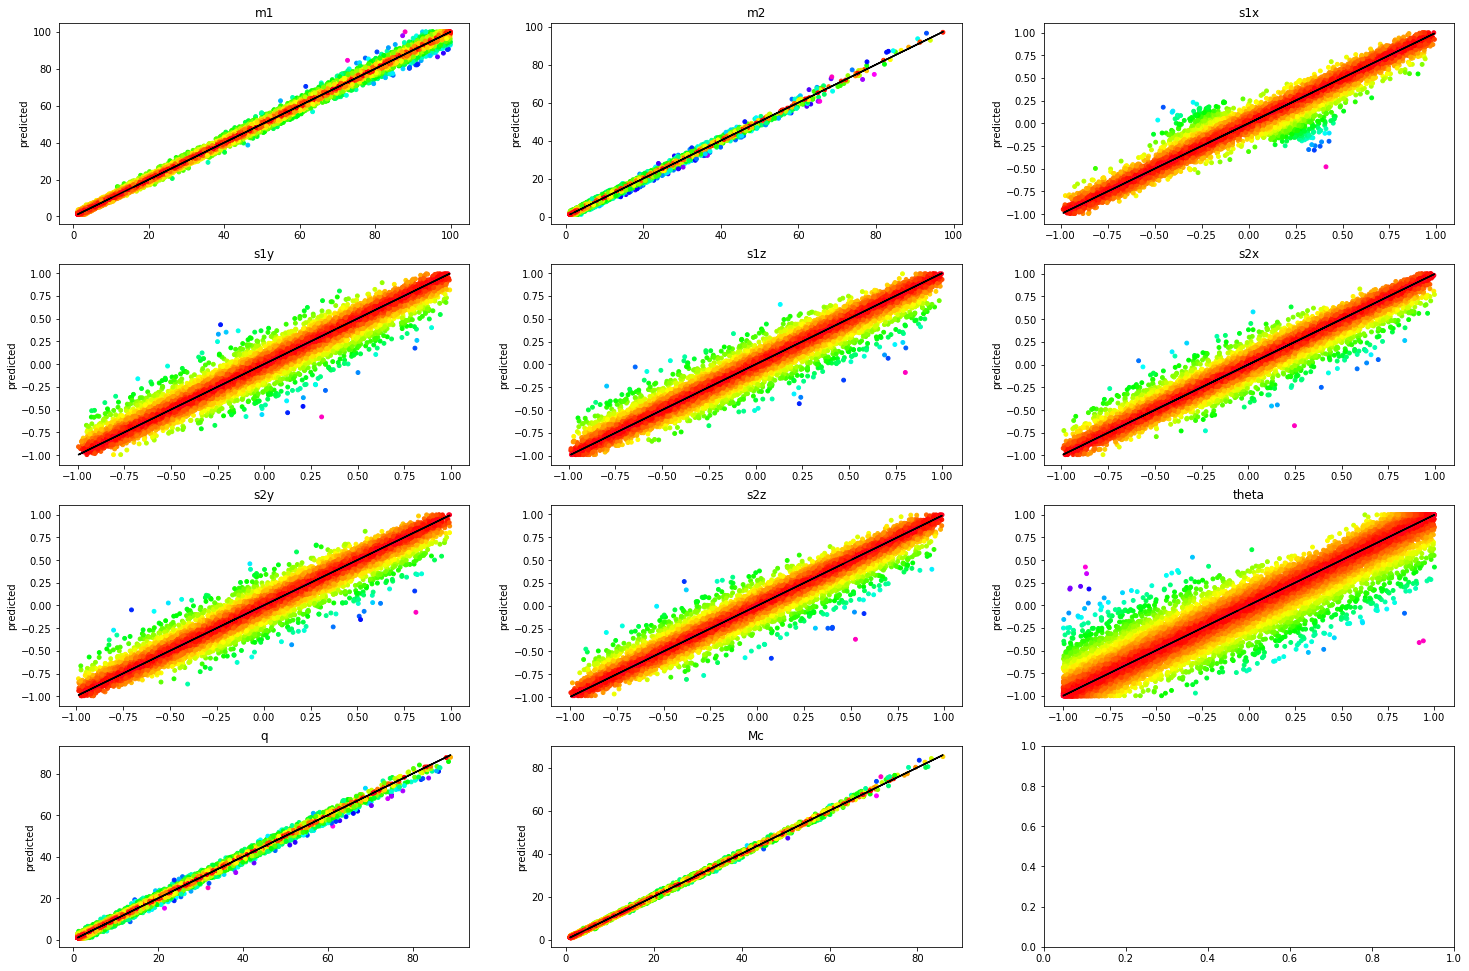

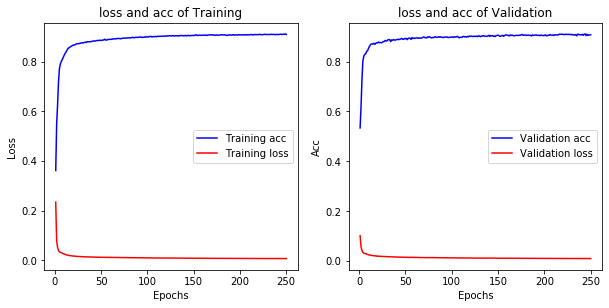

In [6]:
dashes = '*'*80

for key in keys:
    print(dashes, '\nKey: ', key, '\n', dashes, sep='')
        
    # Load all the data for the specific version
    xtrain_notnormalized = extractData(regr_data_dir+key+'train_x.csv', verbose=False)
    ytrain_notnormalized = extractData(regr_data_dir+key+'train_y.csv', verbose=False)
    xtest_notnormalized  = extractData(regr_data_dir+key+'test_x.csv' , verbose=False)
    ytest_notnormalized  = extractData(regr_data_dir+key+'test_y.csv' , verbose=False)
    
    # rescale
    if scaler_str=="standard":
        scaler_x = StandardScaler().fit(xtrain_notnormalized)
        scaler_y = StandardScaler().fit(ytrain_notnormalized)
    elif scaler_str=="minmax":
        scaler_x = MinMaxScaler(feature_range=(-1, 1)).fit(xtrain_notnormalized)
        scaler_y = MinMaxScaler(feature_range=(-1, 1)).fit(ytrain_notnormalized)
    elif scaler_str=="mixed":
        scaler_x = StandardScaler().fit(xtrain_notnormalized)
        scaler_y = MinMaxScaler(feature_range=(-1, 1)).fit(ytrain_notnormalized)
    else:
        print('scaler "',scaler_str,'" not recognized!',sep='')
        sys.exit()
        
    xtrain   = scaler_x.transform(xtrain_notnormalized)
    ytrain   = scaler_y.transform(ytrain_notnormalized)
    xtest    = scaler_x.transform(xtest_notnormalized)
    ytest    = scaler_y.transform(ytest_notnormalized)
    

    # build the model
    model = buildModelUsingSequential(hlayers_sizes, batch_size, Nfeatures)

    # compile 
    model.compile(
        loss=mse, 
        optimizer=Adam(learning_rate=learning_rate), 
        metrics=[mse, 'accuracy']
    )
    
    model.summary()
    
    # train the model
    t0 = time.perf_counter()
    history = model.fit(xtrain, ytrain, 
        epochs           = epochs, 
        batch_size       = batch_size,
        validation_split = validation_split,
        verbose          = verbose_training
    )
    train_time = time.perf_counter()-t0
    
    # predict
    ypredicted = model.predict(xtest)
    
    R2_vec = np.zeros((Nfeatures,))
    for i in range(0,Nfeatures):
         R2_vec[i] = R2(ytest[:,i], ypredicted[:,i])
    
    # print some information
    metrics_dict    = {};
    metrics_results = model.evaluate(xtest, ytest, verbose=0)
    metrics_dict["loss"]   = metrics_results[0]
    metrics_dict["mse"]    = metrics_results[1]
    metrics_dict["acc"]    = metrics_results[2]
    metrics_dict["R2"]     = R2_vec
    metrics_dict["R2mean"] = np.mean(R2_vec)
    
    print('\nFinal loss     :', metrics_dict["loss"])
    print('Final mse      :', metrics_dict["mse"])
    print('Final accuracy :', metrics_dict["acc"])
    print('Final R2 mean  :', metrics_dict["R2mean"])
    for i in range(0,Nfeatures):
        print('R2[{:2d}]         : {:.5f}'.format(i,metrics_dict["R2"][i]))
        
    # update dictionary adding data (both normalized and not), model and score
    datasets[key].train_time = train_time
    datasets[key].model      = model
    datasets[key].history    = history
    datasets[key].predicted  = scaler_y.inverse_transform(ypredicted)
    datasets[key].metrics    = metrics_dict
    
    # plot
    predictionPlots(scaler_y.inverse_transform(ytest), 
                scaler_y.inverse_transform(ypredicted), 
                features_names)
    
    del model
    
    plotHistory(history)

## Produce CSV files

In [7]:
if write_output:
    for key in keys:
        # save csv
        filename = out_data_dir+'NN_tf_'+key+'.csv'
        writeResult(filename, datasets[key].predicted, verbose=True)
        
        # save model
        #dict_name = out_data_dir+'NN_tf_'+key+'.dict'
        #pickle.dump(datasets[key].model, open(dict_name, 'wb'))
        #print(dict_name, 'saved') 
        
        # example for loading models
        #dict_name    = out_data_dir+'NN_tf_'+key+'.dict'
        #print('Loading', dict_name, '...')
        #loaded_model = pickle.load(open(dict_name, 'rb'))